In [2]:
import cv2                              # ==> 이미지 데이터 ndarray
%pip install pillow                   # pillow 설치
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedShuffleSplit

from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Note: you may need to restart the kernel to use updated packages.


In [15]:
import os
from rembg import remove
from PIL import Image

# 배경 제거할 이미지들이 있는 루트 폴더 경로
input_root_dir = './image/skinImage/'  # 배경 제거할 이미지들이 있는 루트 폴더
output_root_dir = './image/skinImaged/'  # 결과 이미지를 저장할 루트 폴더

# 결과 저장 루트 폴더가 존재하지 않으면 생성
os.makedirs(output_root_dir, exist_ok=True)

# 입력 디렉토리의 모든 하위 디렉토리 및 이미지 파일 처리
for dirpath, _, filenames in os.walk(input_root_dir):
    for filename in filenames:
        # 파일 확장자가 이미지 파일인지 확인
        i = 0
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            input_path = os.path.join(dirpath, filename)  # 입력 파일 경로
            # 출력 파일 경로 생성 (상대 경로를 유지)
            relative_path = os.path.relpath(input_path, input_root_dir)
            output_path = os.path.join(output_root_dir, relative_path)  # 출력 파일 경로

            # 출력 디렉토리 생성
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # 이미지 열기 및 배경 제거
            img = Image.open(input_path)
            out = remove(img)

            # JPEG는 알파 채널을 지원하지 않으므로 RGB로 변환
            if out.mode == 'RGBA':
                out = out.convert('RGB')

            # 결과 이미지 저장
            out.save(output_path)
            i+=1
            if i >= 1000 : break

KeyboardInterrupt: 

In [4]:
import os
from rembg import remove
from PIL import Image
import concurrent.futures

# 배경 제거할 이미지들이 있는 루트 폴더 경로
input_root_dir = './image/skinImage/'  # 배경 제거할 이미지들이 있는 루트 폴더
output_root_dir = './image/skinImaged/'  # 결과 이미지를 저장할 루트 폴더

# 결과 저장 루트 폴더가 존재하지 않으면 생성
os.makedirs(output_root_dir, exist_ok=True)

def process_image(input_path):
    """이미지 배경 제거 및 저장 함수"""
    filename = os.path.basename(input_path)  # 파일 이름
    # 출력 파일 경로 생성 (상대 경로를 유지)
    relative_path = os.path.relpath(input_path, input_root_dir)
    output_path = os.path.join(output_root_dir, relative_path)  # 출력 파일 경로

    # 출력 디렉토리 생성
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # 이미지 열기 및 배경 제거
    img = Image.open(input_path)
    out = remove(img)

    # JPEG는 알파 채널을 지원하지 않으므로 RGB로 변환
    if out.mode == 'RGBA':
        out = out.convert('RGB')

    # 결과 이미지 저장
    out.save(output_path)

# 입력 디렉토리의 모든 하위 디렉토리 및 이미지 파일 처리
image_files = []
for dirpath, _, filenames in os.walk(input_root_dir):
    for filename in filenames:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_files.append(os.path.join(dirpath, filename))

# 병렬 처리
with concurrent.futures.ThreadPoolExecutor() as executor:
    # 최대 1000개 이미지까지 처리
    futures = {executor.submit(process_image, input_path): input_path for input_path in image_files[:1000]}
    
    for future in concurrent.futures.as_completed(futures):
        input_path = futures[future]
        try:
            future.result()  # 예외가 발생하면 여기에서 확인
            # print(f"Processed: {input_path}")
        except Exception as exc:
            print(f"{input_path} generated an exception: {exc}")

In [2]:
from torchvision import transforms

transform = transforms.Compose([
    v2.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

In [3]:
## 데이터 관련 변수
DATA_DIR='./image/skinImage/'
SAVE_PATH = './mymodule/'
SAVE_FILE = 'skinwb.pth'
SAVE_MODEL = 'skinmodel.pth'

In [4]:
## 데이터 변형 및 전처리
transConvert = v2.Compose([
    v2.Resize(size=(128, 128)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

In [5]:
DATA_DIR = './image/skinImage/'
imgDS = ImageFolder(root=DATA_DIR, transform=transConvert)

In [8]:
import os
import random
from torchvision import transforms
from PIL import Image

DATA_DIR = './image/skinImage/'
OUTPUT_DIR = './image/augmented/'

# 데이터 증강을 위한 변환
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),  # Tensor로 변환
])

# 증강할 클래스 이름을 지정합니다.
target_class_name = 'Eczema'  # 예: Melanocytic Nevi

# 데이터 증강을 위한 디렉토리 생성
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# 선택한 클래스의 데이터 증강
class_dir = os.path.join(DATA_DIR, target_class_name)
if os.path.isdir(class_dir):
    images = os.listdir(class_dir)
    random.shuffle(images)  # 랜덤 샘플링을 위해 섞기
    count = 0
    
    # 1000개 증강된 이미지 생성
    for img_name in images[:500]:
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path).convert("RGB")  # PIL Image로 열기
        
        # 변환 적용
        img_tensor = transform(img)  # Tensor로 변환
        
        # tensor를 PIL Image로 변환
        img_augmented = transforms.ToPILImage()(img_tensor)
        
        # 증강된 이미지 저장
        augmented_img_path = os.path.join(OUTPUT_DIR, f"{target_class_name}_{count}.png")
        img_augmented.save(augmented_img_path)
        count += 1
        
    print(f"클래스 {target_class_name}에서 1000개 데이터 증강 완료.")
else:
    print(f"클래스 {target_class_name} 디렉토리가 존재하지 않습니다.")

클래스 Eczema에서 1000개 데이터 증강 완료.


In [10]:
import os
import random
import shutil

DATA_DIR = './image/skinImage/'
DOWNSAMPLED_DIR = './image/downsized/'

# 다운샘플링할 클래스 이름을 지정합니다.
target_class_name = 'Melanoma'  # 예: Melanocytic Nevi

# 다운샘플링할 디렉토리 생성
if not os.path.exists(DOWNSAMPLED_DIR):
    os.makedirs(DOWNSAMPLED_DIR)

# 다운샘플링할 클래스의 디렉토리 경로
class_dir = os.path.join(DATA_DIR, target_class_name)
if os.path.isdir(class_dir):
    images = os.listdir(class_dir)
    random.shuffle(images)  # 랜덤 샘플링을 위해 섞기

    # 2000개 랜덤 샘플링
    for img_name in images[:2000]:
        src_img_path = os.path.join(class_dir, img_name)
        dest_img_path = os.path.join(DOWNSAMPLED_DIR, target_class_name, img_name)

        # 클래스 디렉토리 생성
        if not os.path.exists(os.path.dirname(dest_img_path)):
            os.makedirs(os.path.dirname(dest_img_path))

        shutil.copy(src_img_path, dest_img_path)

    print(f"클래스 {target_class_name}에서 2000개 데이터 다운샘플링 완료.")
else:
    print(f"클래스 {target_class_name} 디렉토리가 존재하지 않습니다.")


클래스 Melanoma에서 2000개 데이터 다운샘플링 완료.


In [6]:
from collections import Counter

# 각 이미지의 타겟(클래스 인덱스)을 가져옴
targets = [imgDS.targets[i] for i in range(len(imgDS))]

# 클래스별 개수 세기
class_counts = Counter(targets)

# 클래스 이름과 함께 출력
for class_index, count in class_counts.items():
    print(f"클래스 {imgDS.classes[class_index]}: {count}개")


클래스 Atopic Dermatitis: 1257개
클래스 Basal Cell Carcinoma: 3323개
클래스 Benign Keratosis-like Lesions: 2235개
클래스 Eczema: 1677개
클래스 Melanocytic Nevi: 8173개
클래스 Melanoma: 3594개
클래스 Psoriasis pictures Lichen Planus and related diseases: 2382개
클래스 Seborrheic Keratoses and other Benign Tumors: 2180개
클래스 Tinea Ringworm Candidiasis and other Fungal Infections: 1702개
클래스 Vitiligo: 2016개
클래스 Warts Molluscum and other Viral Infections: 2103개


In [67]:
def class_distribution(dataset, original_dataset):
    # 각 클래스의 인덱스 가져오기
    targets = [original_dataset.targets[i] for i in dataset.indices]
    class_counts = np.bincount(targets)
    total_samples = len(targets)
    
    # 클래스 비율 계산
    class_ratios = class_counts / total_samples
    return class_counts, class_ratios

# 원래 데이터셋을 인자로 넘김
train_counts, train_ratios = class_distribution(train_dataset, imgDS)
val_counts, val_ratios = class_distribution(val_dataset, imgDS)
test_counts, test_ratios = class_distribution(test_dataset, imgDS)

print("Train Class Counts:", train_counts)
print("Train Class Ratios:", train_ratios)

print("Validation Class Counts:", val_counts)
print("Validation Class Ratios:", val_ratios)

print("Test Class Counts:", test_counts)
print("Test Class Ratios:", test_ratios)

Train Class Counts: [ 893 2321 1542 1201 5706 2512 1673 1533 1185   22]
Train Class Ratios: [0.04804175 0.1248655  0.08295675 0.06461158 0.30697224 0.13514095
 0.0900043  0.08247256 0.06375081 0.00118356]
Validation Class Counts: [ 182  519  337  253 1231  540  327  344  247    3]
Validation Class Ratios: [0.0456942  0.13030379 0.08460959 0.06351996 0.30906352 0.1355762
 0.08209892 0.08636706 0.06201356 0.0007532 ]
Test Class Counts: [ 182  483  356  223 1236  542  382  303  270    7]
Test Class Ratios: [0.04568273 0.12123494 0.08935743 0.0559739  0.31024096 0.13604418
 0.09588353 0.07605422 0.06777108 0.00175703]


In [49]:
## 데이터셋 생성
imgDS=ImageFolder(root=DATA_DIR, transform=transConvert)

In [125]:
# 전체 데이터셋 크기
dataset_size = len(imgDS)

# Step 1: Train/Validation/Test 비율 설정
train_ratio = 0.7  # 70%는 훈련 데이터
validation_ratio = 0.15  # 15%는 검증 데이터
test_ratio = 0.15  # 15%는 테스트 데이터

# Step 2: Train/Test 나누기 (먼저 Train + Validation과 Test를 나눕니다)
train_val_indices, test_indices = train_test_split(range(dataset_size), test_size=test_ratio, stratify=imgDS.targets)

# Step 3: Train/Validation 나누기 (Train + Validation 세트를 다시 Train과 Validation으로 나눕니다)
train_indices, val_indices = train_test_split(train_val_indices, test_size=validation_ratio/(train_ratio + validation_ratio), stratify=[imgDS.targets[i] for i in train_val_indices])

# Step 4: Create subsets for train, validation, and test
train_dataset = Subset(imgDS, train_indices)
val_dataset = Subset(imgDS, val_indices)
test_dataset = Subset(imgDS, test_indices)

# Step 5: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 데이터셋 크기 출력
print(f"Train size: {len(train_indices)}")
print(f"Validation size: {len(val_indices)}")
print(f"Test size: {len(test_indices)}")

Train size: 17755
Validation size: 3805
Test size: 3805


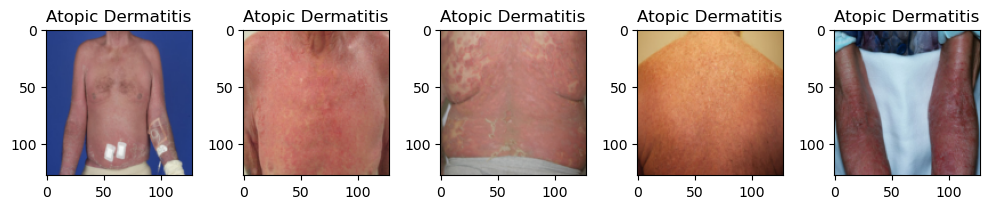

In [99]:
#### [테스트]
import matplotlib.pyplot as plt

LABEL_NAMES = imgDS.classes

# 3개 데이터와 타겟 로딩
fig, axes=plt.subplots(1,5, figsize=(10, 4))
for idx, (img_data, target) in enumerate(imgDS) :
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(LABEL_NAMES[target])
    if idx==4: break
plt.tight_layout()
plt.show()

In [110]:
for feature,target in train_loader:
    print(feature.shape,target)
    break

torch.Size([64, 3, 128, 128]) tensor([ 0, 10,  6,  6,  4,  9,  1,  5,  2, 10,  3, 10,  3,  0,  3,  8,  7,  1,
        10,  5,  1,  3, 10,  0,  7,  2,  9,  2,  5,  1,  7,  5,  0,  5,  8,  6,
        10,  1,  2,  2,  4,  1,  1,  9, 10,  8,  5,  3,  6,  4,  2,  2,  1,  8,
         5,  1,  5,  9, 10,  4,  5, 10,  8, 10])


In [127]:
tar_num = len(imgDS.classes)
class SkinKitModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.features=nn.Sequential(
            nn.Conv2d(3,16,3),
            nn.ReLU(),
            nn.MaxPool2d(2,stride=2),
            nn.Conv2d(16,32,3),
            nn.Conv2d(32,64,3),
            nn.ReLU(),
            nn.MaxPool2d(2,stride=2),                       
        )
        
        self.classifier=nn.Sequential(
            nn.Linear(29*29*64, 512),
            nn.ReLU(),
            nn.Dropout(0.5,inplace=False),
            nn.Linear(512, 256),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.5,inplace=False),
            nn.Linear(128,tar_num)       
        )
        
    def forward(self, data):
        output=self.features(data)
        # print(output.shape)
        output=output.view(output.shape[0], -1)
        return F.softmax(self.classifier(output),dim=1)

In [128]:
for i in range(tar_num):
    print(imgDS.classes[i],':',imgDS.targets.count(i))

Atopic Dermatitis : 2246
Basal Cell Carcinoma : 2628
Benign Keratosis-like Lesions : 2235
Eczema : 2177
Melanocytic Nevi : 2680
Melanoma : 2658
Psoriasis pictures Lichen Planus and related diseases : 2382
Seborrheic Keratoses and other Benign Tumors : 2180
Tinea Ringworm Candidiasis and other Fungal Infections : 2060
Vitiligo : 2016
Warts Molluscum and other Viral Infections : 2103


In [79]:
train_dataset.indices

array([12989, 17361,  9539, ...,  7937,  3158, 18768], dtype=int64)

In [103]:
model = SkinKitModel()

In [129]:
# 6. 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 다중 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 7. 모델 학습
epochs = 10
patience = 10  # 성능 향상이 없을 때 10번의 에포크 후 학습을 중단

best_loss = float('inf')  # 초기값을 매우 큰 값으로 설정
trigger_times = 0  # 개선되지 않은 에포크 수

In [133]:
LOSS_HISTORY, SCORE_HISTORY = [[],[]],[[],[]]
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    train_pred = 0
    for features, targets in train_loader:
        outputs = model(features)
        loss = criterion(outputs, targets)  # float형으로 변환
        outputs_max = torch.max(outputs,dim=1).indices
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        train_pred += f1_score(outputs_max,targets,average='weighted').item()

    avg_loss_train = epoch_loss / len(train_loader)
    train_f1 = train_pred / len(train_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss_train:.4f}, F1: {train_f1:.4f}')

    LOSS_HISTORY[0].append(avg_loss_train)
    SCORE_HISTORY[0].append(train_f1)

    # 8. 교차검증
    model.eval()
    v_pred = 0
    v_loss = 0
    with torch.no_grad():
        for features, targets in val_loader:
            outputs = model(features)
            outputs_max = torch.max(outputs,dim=1).indices
            v_pred = f1_score(outputs_max,targets,average='weighted').item()
            loss = criterion(outputs, targets)
            v_loss += loss.item()
            
        avg_loss_val = epoch_loss / len(val_loader)
        val_f1 = v_pred / len(val_loader)

        LOSS_HISTORY[1].append(avg_loss_val)
        SCORE_HISTORY[1].append(val_f1)

    # Early Stopping 적용
    if avg_loss_train < best_loss:
        best_loss = avg_loss_train  # 손실이 줄어들면 가장 좋은 손실 업데이트
        trigger_times = 0  # 성능이 개선된 경우 카운트를 초기화
    else:
        trigger_times += 1  # 성능이 개선되지 않은 경우 카운트 증가
        print(f"No improvement in {trigger_times} epochs")
    
    if trigger_times >= patience:
        print(f"Early stopping triggered at epoch {epoch+1}")
        break  # 일정 에포크 동안 개선이 없으면 학습 중단

    if len(SCORE_HISTORY[1]) == 1:
        # 첫번째라서 무조건 모델 파라미터 저장
        torch.save(model.state_dict(),SAVE_PATH+SAVE_FILE)
        # 모델 전체 저장
        torch.save(model,SAVE_PATH+SAVE_MODEL)
    else:
        if SCORE_HISTORY[1][-1] >= max(SCORE_HISTORY[1]):
            # torch.save(model.state_dict(),f'{SAVE_PATH}{SAVE_FILE}_{epoch}_{LOSS_HISTORY[1][-1]}')
            torch.save(model.state_dict(),SAVE_PATH+SAVE_FILE)
            # 모델 전체 저장
            torch.save(model,SAVE_PATH+SAVE_MODEL)
            
# 8. 모델 평가
model.eval()
f1 = 0
accuracy = 0

with torch.no_grad():
    for features, targets in test_loader:
        outputs = model(features)
        outputs_max = torch.max(outputs,dim=1).indices
        f1 += f1_score(outputs_max,targets,average='weighted').item()
        accuracy += accuracy_score(outputs_max, targets).item()
        
    f1 = f1 / len(test_loader)
    accuracy = accuracy / len(test_loader)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

KeyboardInterrupt: 